<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Computer_Vision_Nanodegree_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # used to manipulate tensor data (like matrices)

import matplotlib.image as mpimg # can be used to read and manipulate images (will read in RGB format)

import matplotlib.pyplot as plt # used to make plots

%matplotlib inline

import cv2 # computer vision library (reads images in BGR format)

# *1.1 Image Representation*

---



# 1. Images as Numerical Data

# Working with matplotlib.image and matplotlib.pyplot libraries


Image dimensions:  (427, 640, 3)
159
Minimum intensity value:  2
Maximum intensity value:  255


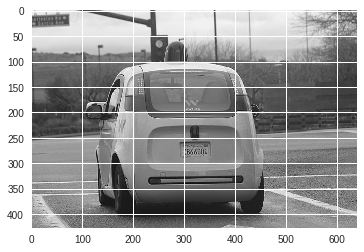

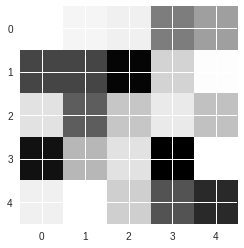

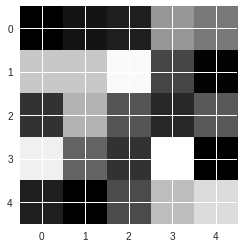

In [0]:
# reading an image -> image = mpimg.imread("image path"); will be read in RGB 
# format

image = mpimg.imread("waymo_car.jpg")

# image dimensions = image.shape; will return height (no. of rows), width (no. 
# of columns), no. of channels

print("Image dimensions: ", image.shape)

# gray_sacle = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY); converting to grayscale 
# using cv2

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # if image was read using 
# cv2, we would've used cv2.COLOR_BGR2GRAY

# creating empty figure to plot on -> plt.figure(figure_no)

plt.figure(1)

# displaying using patplotlib.pyplot -> plt.imshow(image, cmap)

plt.imshow(gray_image, cmap = "gray") # color map helps in grayscale images, 
# but can be omitted with color images

# working with individual pixels -> a = gray_scale[row, column]; will return the
# intensity value at that particular row and column

y = 300
x = 400
print(gray_image[y, x])

# finding out the maximum and minimum intensity values in an image ->
# max = np.amax(gray_scale_image), min = np.amax(image)              

print("Minimum intensity value: ", np.amin(gray_image))
print("Maximum intensity value: ", np.amax(gray_image))

# creating own image  (2D numpy array), and then displaying it first without
# using color map (wrong), and then while using color map (correct)

my_image = np.array([[0, 20, 30, 150, 120],
                    [200, 200, 250, 70, 3],
                    [50, 180, 85, 40, 90],
                    [240, 100, 50, 255, 0],
                    [30, 0, 75, 190, 220]])

plt.figure(2)
plt.imshow(my_image)
plt.figure(3)
plt.imshow(my_image, cmap = "gray")

# 2. Visualizing RGB Channels

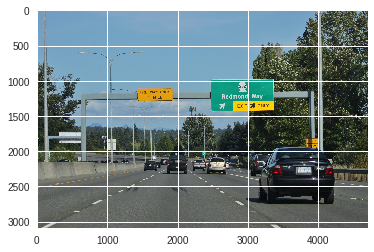

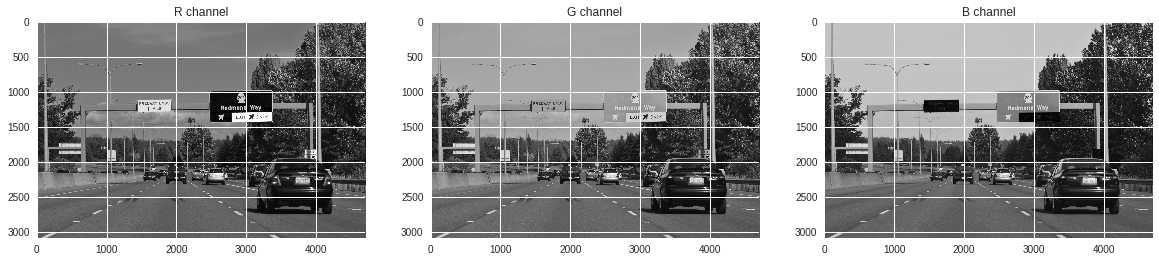

In [0]:
image = mpimg.imread("wa_state_highway.jpg")

plt.figure(1)
plt.imshow(image)

# extracting individual channels -> image[:,:, channel_no]

r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# creating multiple plots in a grid fashion -> plt.subplots(rows, columns, 
# figsize = (width, height)); returns the figures and the corresponding axes

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

# selecting a particular axes handle and setting its title -> 
# axes_handle.set_title('title')
# displaying on particular axes handle -> axes_handle.imshow(image)

ax1.set_title('R channel')
ax1.imshow(r, cmap = "gray")
ax2.set_title('G channel')
ax2.imshow(g, cmap = "gray")
ax3.set_title('B channel')
ax3.imshow(b, cmap = "gray")

# 3. Background Transfer: Blue Screen, Green Screen using RGB Thresholds


Dimensions of image are:  (514, 816, 3)
Type of original image:  <class 'numpy.ndarray'>
Type of copied image:  <class 'numpy.ndarray'>
[ 11  36 251]
255


Text(0.5,1,'Background transferred')

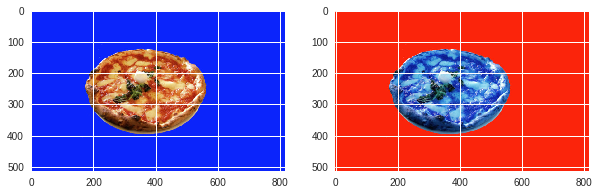

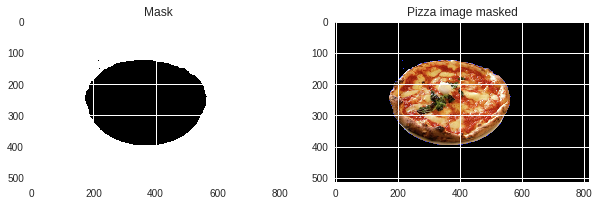

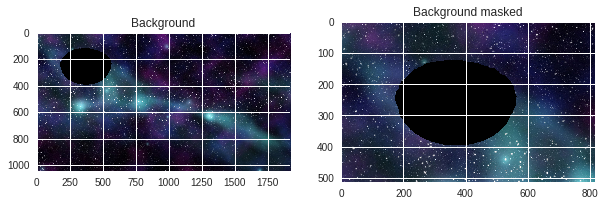

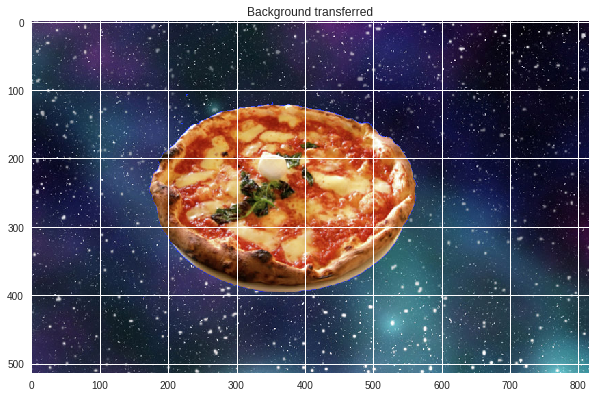

In [0]:
# Geneal idea: 
# 1. read the image containing the foreground and the background screen
# 2. convert it into the desired color space
# 3. explore the background screen in order to come up with a range of 
# thresholds
# 4. create a mask for the background screen
# 5. zero all values where mask is non-zero i.e.this will leave us with only the
# foreground
# 6. read the image containing the background, and resize (or crop) it to our 
# foreground image size
# 7. apply the mask on the background image by zeroing all values for which the 
# mask is zero i.e. this will select the entire background region, and black out 
# the portion where the foreground is supposed to come
# 8. just add the two foreground and background masked images to complete 
# background transfer

image = cv2.imread("pizza_bluescreen.jpg")

# copying an image -> np.copy(image); this makes sure that we don't damage the
# original image

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

print("Dimensions of image are: ", image_copy.shape)
print("Type of original image: ", type(image))
print("Type of copied image: ", type(image_copy))

plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.imshow(image_copy)
ax2.imshow(image)

# we can explore the color of the background in order to set the thresholds

print(image_copy[100, 200])

# creating a thresholded mask of a colored image -> cv2.inRange(image, numpy 
# array 0f lower threshold colors, numpy array of higher threshold colors)
# the mask is 0 where the color values don't lie in this range and 255 where the
# color values do lie within this range

lower = np.array([0, 0, 230])
upper = np.array([50, 50, 255])
mask = cv2.inRange(image_copy, lower, upper)

print(mask[100, 200])

# now we can select that region of our image which is our current background
# and we can set its value to zero; this is the region where the mask is 255

mask_image = np.copy(image_copy)
mask_image[mask != 0] = [0, 0, 0]

# we can now create the background mask of the background we desire
# we can read our desired background image -> crop it such that it has the same 
# dimensions as our original image, and then we can make that portion zero 
# where our foreground will be placed

background = cv2.imread("space_background.jpg")
bg_copy = np.copy(background)
bg_copy = cv2.cvtColor(bg_copy, cv2.COLOR_BGR2RGB)

bg_mask = bg_copy[:image_copy.shape[0], :image_copy.shape[1]]
bg_mask[mask == 0] = [0, 0, 0]

# finally, we can add the foreground and the background

background_transferred = bg_mask + mask_image

plt.figure(2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.set_title("Mask")
ax1.imshow(mask, cmap = "gray")
ax2.set_title("Pizza image masked")
ax2.imshow(mask_image)

plt.figure(3)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.set_title("Background")
ax1.imshow(bg_copy)
ax2.set_title("Background masked")
ax2.imshow(bg_mask)

plt.figure(4)
f, (ax1) = plt.subplots(1, 1, figsize = (10, 20))
ax1.imshow(background_transferred)
ax1.set_title("Background transferred")


Dimensions of image are:  (450, 660, 3)
Type of original image:  <class 'numpy.ndarray'>
Type of copied image:  <class 'numpy.ndarray'>
[ 41 253  47]
255


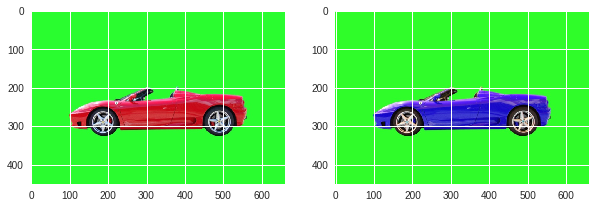

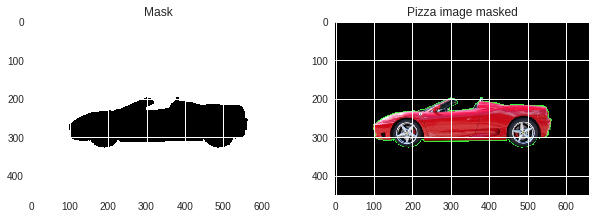

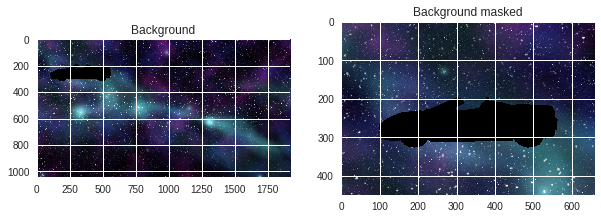

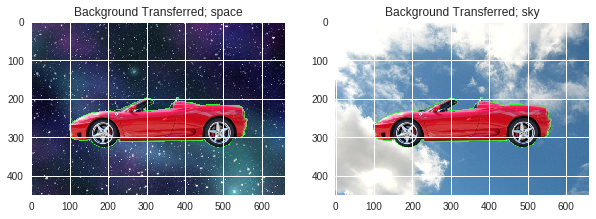

In [0]:
image = cv2.imread("car_green_screen.jpg")
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

print("Dimensions of image are: ", image_copy.shape)
print("Type of original image: ", type(image))
print("Type of copied image: ", type(image_copy))

plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.imshow(image_copy)
ax2.imshow(image)

print(image_copy[100, 200])

lower = np.array([0, 230, 0])
upper = np.array([50, 255, 250])
mask = cv2.inRange(image_copy, lower, upper)

print(mask[100, 200])

mask_image = np.copy(image_copy)
mask_image[mask != 0] = [0, 0, 0]

background = cv2.imread("space_background.jpg")
bg_copy = np.copy(background)
bg_copy = cv2.cvtColor(bg_copy, cv2.COLOR_BGR2RGB)

bg_mask = bg_copy[:image_copy.shape[0], :image_copy.shape[1]]
bg_mask[mask == 0] = [0, 0, 0]

background_transferred = bg_mask + mask_image

background_2 = cv2.imread("sky.jpg")
bg_copy_2 = np.copy(background_2)
bg_copy_2 = cv2.cvtColor(bg_copy_2, cv2.COLOR_BGR2RGB)

bg_mask_2 = bg_copy_2[:image_copy.shape[0], :image_copy.shape[1]]
bg_mask_2[mask == 0] = [0, 0, 0]

background_transferred_2 = bg_mask_2 + mask_image

plt.figure(2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.set_title("Mask")
ax1.imshow(mask, cmap = "gray")
ax2.set_title("Pizza image masked")
ax2.imshow(mask_image)

plt.figure(3)
f, (ax3, ax4) = plt.subplots(1, 2, figsize = (10, 20))
ax3.set_title("Background")
ax3.imshow(bg_copy)
ax4.set_title("Background masked")
ax4.imshow(bg_mask)

plt.figure(4)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.set_title("Background Transferred; space")
ax1.imshow(background_transferred)
ax2.set_title("Background Transferred; sky")
ax2.imshow(background_transferred_2)


# 4. Thresholding Using HSV Color Space

[188 107 126]
[186 108 132]
[196 142 158]
[156 110 139]
[192 136 161]
[222 194 208]


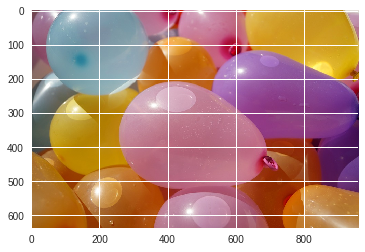

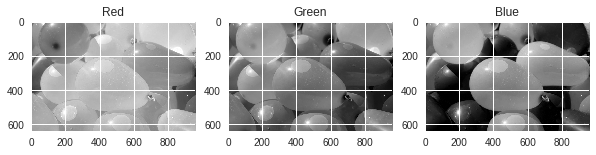

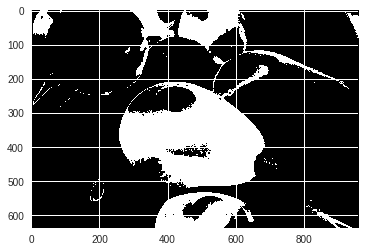

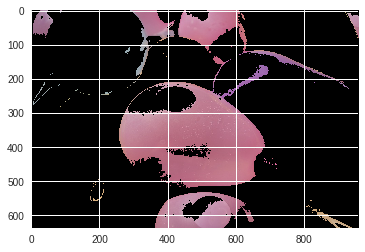

In [0]:
# idea: to only select the pink balloon using both rgb as well as hsv approaches

# RGB approach 

image = cv2.imread("water_balloons.jpg")
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

# splitting into individual channels -> channel = image[:,:,channel_no]; this 
# returns a gray scale version of that channel

r = image_copy[:,:,0]
g = image_copy[:,:,1]
b = image_copy[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.set_title('Red')
ax1.imshow(r, cmap = 'gray')
ax2.set_title('Green')
ax2.imshow(g, cmap = 'gray')
ax3.set_title('Blue')
ax3.imshow(b, cmap = 'gray')

print(image_copy[400, 400])
print(image_copy[400, 600])
print(image_copy[300, 400])
print(image_copy[50, 20])
print(image_copy[600, 400])
print(image_copy[250, 370])

lower = np.array([150, 100, 120])
upper = np.array([230, 180, 180])

mask = cv2.inRange(image_copy, lower, upper)

plt.figure(3)
plt.imshow(mask, cmap = "gray")

masked = np.copy(image_copy)
masked[mask == 0] = (0, 0, 0)

plt.figure(4)
plt.imshow(masked)

[173 110 188]
[171 107 186]
[171  70 196]
[161  75 156]
[167  74 192]
[165  32 222]


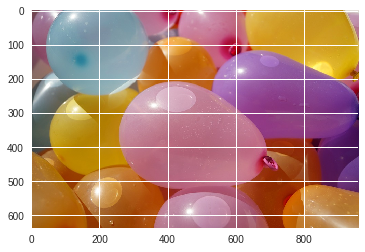

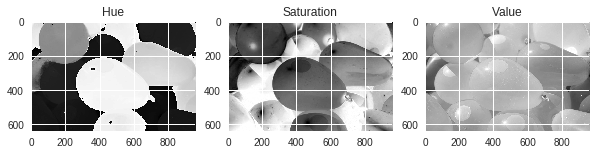

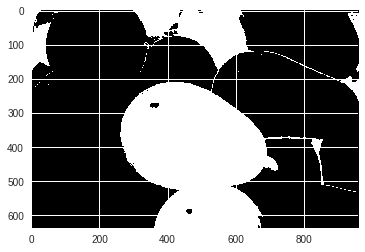

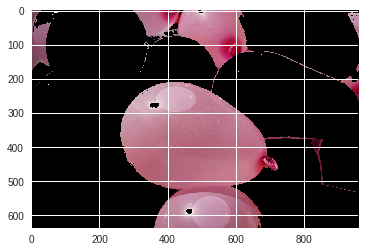

In [0]:
# HSV approach 

image = cv2.imread("water_balloons.jpg")
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

# converting to hsv color space -> cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

# splitting individual channels

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.set_title('Hue')
ax1.imshow(h, cmap = 'gray')
ax2.set_title('Saturation')5
ax2.imshow(s, cmap = 'gray')
ax3.set_title('Value')
ax3.imshow(v, cmap = 'gray')

# exploring the relevant regions in order to select the optimum threshold range

print(hsv[400, 400])
print(hsv[400, 600])
print(hsv[300, 400])
print(hsv[50, 20])
print(hsv[600, 400])
print(hsv[250, 370])

# creating a range of threshold values
# generally, hsv only requires a range for 'h', 's' and 'v' can be allowed their
# full ranges

lower = np.array([160, 0, 0])
upper = np.array([180, 255, 255])

# creating a mask

mask = cv2.inRange(hsv, lower, upper)

plt.figure(3)
plt.imshow(mask, cmap = "gray")

# zeroing out those portions of the image where the mask is zero

masked = np.copy(hsv)
masked[mask == 0] = (0, 0, 0)

# plt.figure(4)
# plt.imshow(masked)

masked_in_RGB = cv2.cvtColor(masked, cv2.COLOR_HSV2RGB)

plt.figure(4)
plt.imshow(masked_in_RGB)

# 5. Background Transfer: Green Screen using HSV Thresholds


Dimensions of image are:  (450, 660, 3)
Type of original image:  <class 'numpy.ndarray'>
Type of copied image:  <class 'numpy.ndarray'>
[ 61 164 225]
[ 61 213 120]
[ 60 162 225]
[ 61 213 120]
255


Text(0.5,1,'Background transferred')

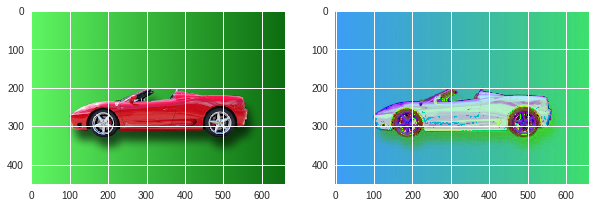

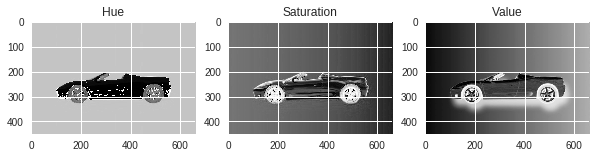

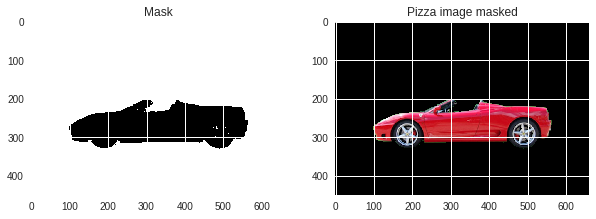

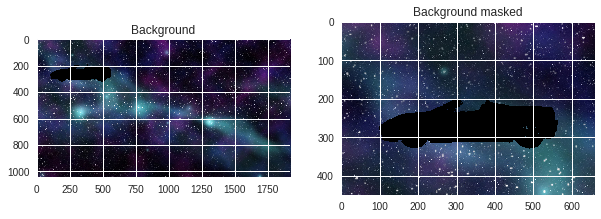

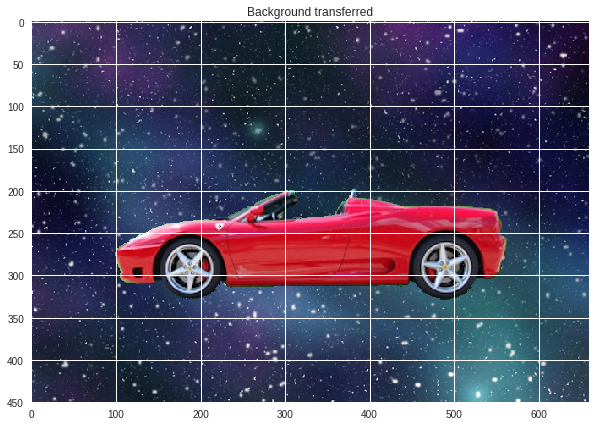

In [0]:
image = cv2.imread("car_green_screen2.jpg")

image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

print("Dimensions of image are: ", image_copy.shape)
print("Type of original image: ", type(image))
print("Type of copied image: ", type(image_copy))

# converting to hsv color space

hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

plt.figure(1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.imshow(image_copy)
ax2.imshow(hsv)

# exploring the hsv channels individually -> we can clearly see that the 
# background has a fairly consistent hue value

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

plt.figure(1)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 20))
ax1.set_title('Hue')
ax1.imshow(h)
ax2.set_title('Saturation')
ax2.imshow(s)
ax3.set_title('Value')
ax3.imshow(v)

# we can explore the color of the background in order to set the thresholds

print(hsv[100, 100])
print(hsv[100, 600])
print(hsv[400, 100])
print(hsv[400, 600])

# creating a thresholded mask of a colored image -> cv2.inRange(image, numpy 
# array 0f lower threshold colors, numpy array of higher threshold colors)
# the mask is 0 where the color values don't lie in this range and 255 where the
# color values do lie within this range

lower = np.array([55, 0, 0])
upper = np.array([65, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

print(mask[100, 200])

# now we can select that region of our image which is our current background
# and we can set its value to zero; this is the region where the mask is 255

mask_image = np.copy(image_copy)
mask_image[mask != 0] = [0, 0, 0]

# we can now create the background mask of the background we desire
# we can read our desired background image -> crop it such that it has the same 
# dimensions as our original image, and then we can make that portion zero 
# where our foreground will be placed

background = cv2.imread("space_background.jpg")
bg_copy = np.copy(background)
bg_copy = cv2.cvtColor(bg_copy, cv2.COLOR_BGR2RGB)

bg_mask = bg_copy[:image_copy.shape[0], :image_copy.shape[1]]
bg_mask[mask == 0] = [0, 0, 0]

# finally, we can add the foreground and the background

background_transferred = bg_mask + mask_image

plt.figure(2)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.set_title("Mask")
ax1.imshow(mask, cmap = "gray")
ax2.set_title("Pizza image masked")
ax2.imshow(mask_image)

plt.figure(3)
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))
ax1.set_title("Background")
ax1.imshow(bg_copy)
ax2.set_title("Background masked")
ax2.imshow(bg_mask)

plt.figure(4)
f, (ax1) = plt.subplots(1, 1, figsize = (10, 20))
ax1.imshow(background_transferred)
ax1.set_title("Background transferred")


# 6. Building an Image Classifier to Detect Day or Night from Images

In [0]:
import os # used to work with directories
import glob # used to parse through directories

# this function is supposed to load the data along with its label

def load_dataset(image_dir):
  
  # initializing an empty list in which the data will be stored as follows:
  # [(x_1, y_1), (x_2, y_2), . . ., (x_n, y_n)] where x_i = image, y_i = label
  
  image_list = [] 
  
  # two image types 
  
  image_types = ["day", "night"]
  
  # the file extensions end in their respective labels so it is easy to parse 
  # through them - first through directories ending with 'day' and then through
  # directories ending with 'night'
  
  for image_type in image_types:
    
    # glob.glob(filepath in unix style along with string manipulation); used to 
    # parse directories
    # eg: glob.glob('C:/Users/Data/Training/Day/*') will read all files in 
    # this directory irrespective of its name
    
    # os.path.join(a, b, c); joins the 3 strings a, b, c with a '/' inbetween
    # eg: os.path.join('C','Users','Data') -> 'C/Users/Data'
    
    for file in glob.glob(os.path.join(image_dir, image_type, "*")):
      
      image = mpimg.imread(file)
      
      # if there actually was an image
      
      if not image is None:
      
      # appending both the image and its label as a tuple element in the 
      # image_list
      
        image_list.append((image, image_type))
 
  return image_list

In [46]:
# to load data from google drive, we can use this command set

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# path where training data is stored

image_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_1_Image_Representation/day_night_images/training'

In [0]:
# loading dataset

dataset = load_dataset(image_directory)

Shape of the dataset:  (240, 2)
Type of the dataset:  <class 'numpy.ndarray'>
(737, 1024, 3)
night
(458, 800, 3)
day


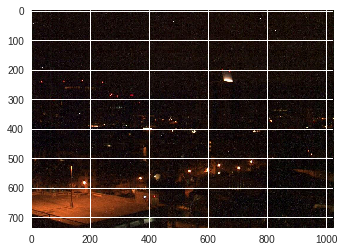

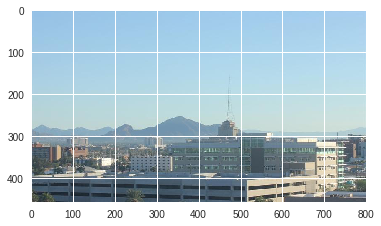

In [49]:
# exploring the dataset

# the structure is as follows: shape of (240, 2) means there are 240 data points
# with two columns, the first column containing the image, and the second 
# containing the label

dataset_1 = np.array(dataset)
print("Shape of the dataset: ", dataset_1.shape)
print("Type of the dataset: ", type(dataset_1))

image_index = 121
print(dataset_1[image_index, 0].shape)
print(dataset_1[image_index, 1])

plt.imshow(dataset_1[image_index, 0])

image_index = 0
print(dataset_1[image_index, 0].shape)
print(dataset_1[image_index, 1])

plt.figure()
plt.imshow(dataset_1[image_index, 0])

In [0]:
# this function should take in an RGB image and return a new, standardized 
# version

# standardizing is necessary as it ensures that all data is in a similar 
# condition

def standardize_input(image):
    
    # TODO: Resize image so that all "standard" images are the same size 
    # 600x1100 (hxw) 
    
    # cv2.resize(image, (desired_height, desired_width)) -> returns a resized 
    # image
    
    standard_im = cv2.resize(image, (600, 1100))
    
    return standard_im
  
# this function will convert the string labels to numerical labels
# since this is a binary classification problem, the labels will be '1' for 
# 'day' and '0' for 'night'
  
# Examples: 
# encode("day") should return: 1
# encode("night") should return: 0

def encode(label):
        
    numerical_val = 0
    
    ## TODO: complete the code to produce a numerical label
    
    if label == "day":
      numerical_val = 0
    elif label == "night":
      numerical_val = 1
    return numerical_val

In [0]:
# this function will take our previous data list, and process it such that all
# the images are the same size and all the labels are numerical

def standardize(image_list):
    
    # empty image data array
    
    standard_list = []

    # iterate through all the image-label pairs
    
    for item in image_list:
        image = item[0]
        label = item[1]

        # standardize the image
        
        standardized_im = standardize_input(image)

        # create a numerical label
        
        binary_label = encode(label)    

        # append the image, and it's one hot encoded label to the full, 
        # processed list of image data 
        
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# standardize all training images 

STANDARDIZED_LIST = standardize(dataset)

In [0]:
# this function takes in an rgb image and finds the average value of the value
# channel from the hsv version of the image

def average_brightness(rgb_image):
  hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
  
  # using np.sum to sum over all values of the value channel
  # had we used simple sum function, it would've summed up column wise
  
  value = np.sum(hsv[:,:,2])
  
  # image area = image_height * image_width
  
  image_area = rgb_image.shape[0] * rgb_image.shape[1]
  
  average_brightness = value/image_area
  
  return average_brightness

192.9562590909091


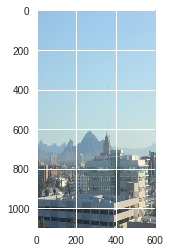

In [53]:
# exploring our average brightness function

a = average_brightness(STANDARDIZED_LIST[0][0])
print(a)
plt.imshow(STANDARDIZED_LIST[0][0])

In [54]:
# now we will go through every image in the dataset and record it's average 
# 'v' channel brightness in a list: one list is for 'day' images, and one is 
# for 'night' images; this will help us in determining a suitable threshold

day_brightness = []
night_brightness = []

for i in STANDARDIZED_LIST:
  if i[1] == 0:
    day_brightness.append(average_brightness(i[0]))
  elif i[1] == 1:
    night_brightness.append(average_brightness(i[0]))

print(len(day_brightness))
print(len(night_brightness))

# calculating the average brightness of both the day list and the night list

average_day_brightness = np.sum(day_brightness)/len(day_brightness)
average_night_brightness = np.sum(night_brightness)/len(night_brightness)

print(average_day_brightness)
print(average_night_brightness)

120
120
137.38209907828283
69.19784325757577


In [0]:
# this is going to be our classifier function and it is going to work as 
# follows: the previously calculated average brightness values are going to be
# passed in and a threshold is going to be defined as the value midway between
# the two averages (the day average and the night average); otherwise we can
# skip the threshold values and just pass in a preferred threshold

def classifier(rgb_image, avg_day_brightness = None, 
               avg_night_brightness = None, 
               threshold = None):
  
  # converting the input image to hsv
  
  hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
  
  # calculating its average 'v' channel brightness
  
  avg_brightness= np.sum(hsv[:,:,2])/(rgb_image.shape[0] * rgb_image.shape[1])
  
  # classifier model
  
  if threshold is None:
    diff = avg_day_brightness - avg_night_brightness
    if avg_brightness < (avg_night_brightness + diff/2):
      return 1
    elif avg_brightness > (avg_day_brightness - diff/2):
      return 0  
  elif threshold is not None:
    if avg_brightness < threshold:
      return 1
    elif avg_brightness > threshold:
      return 0

In [0]:
# this function will simply convert the numerical labels back to strings

def decode(label):
  if label == 0:
    return "day"
  elif label == 1:
    return "night"

average_day_brightness_threshold: 103.28997116792931
average_night_brightness_threshold: 103.28997116792931
91.66666666666666


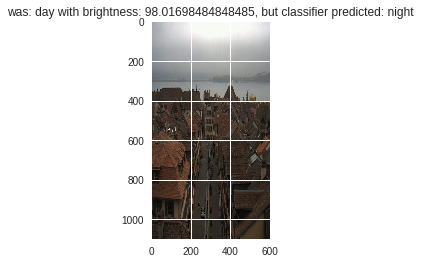

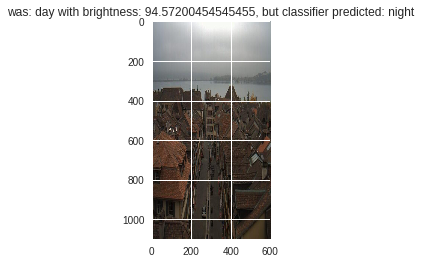

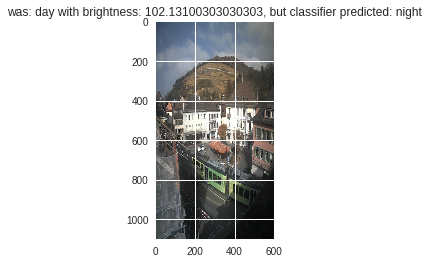

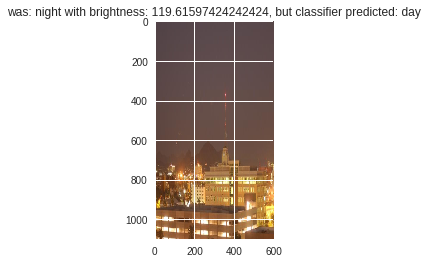

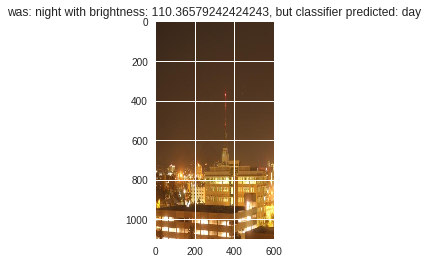

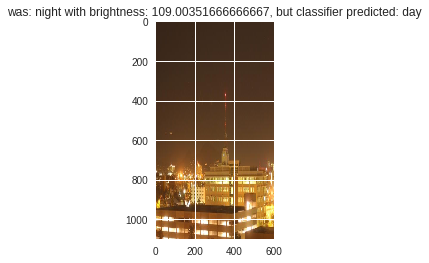

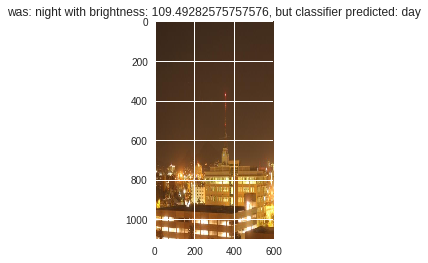

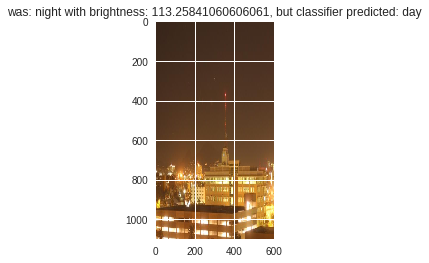

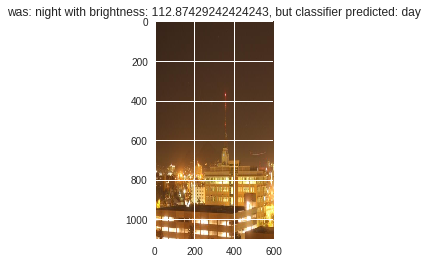

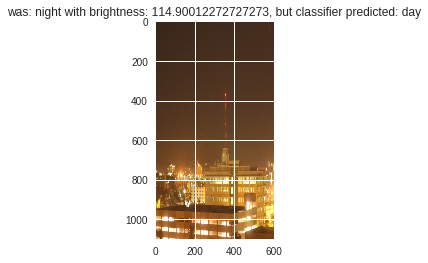

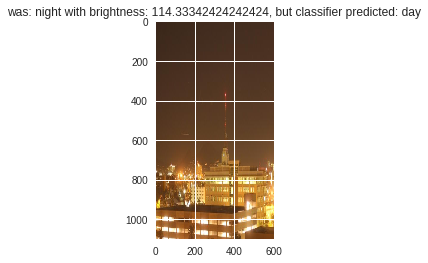

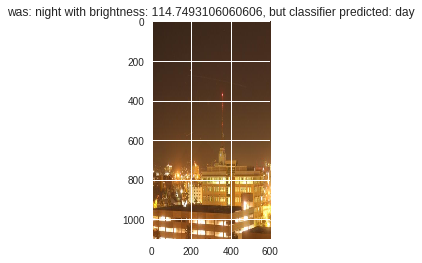

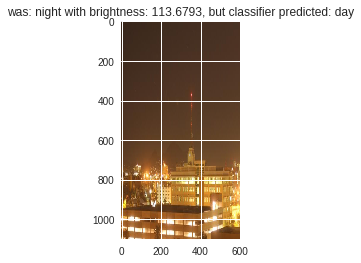

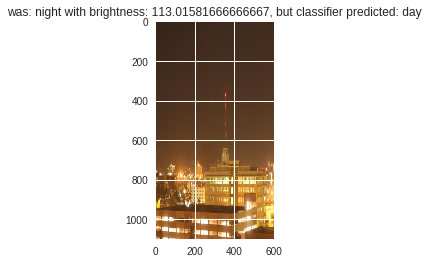

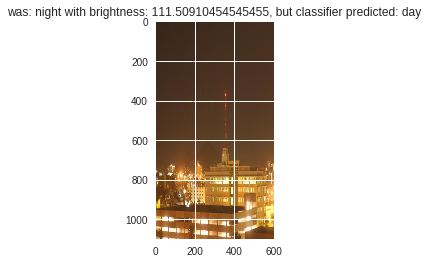

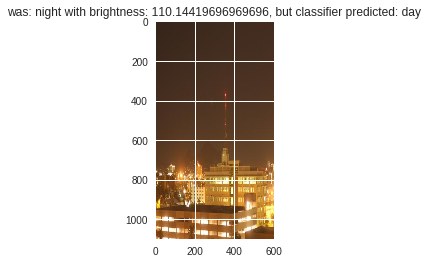

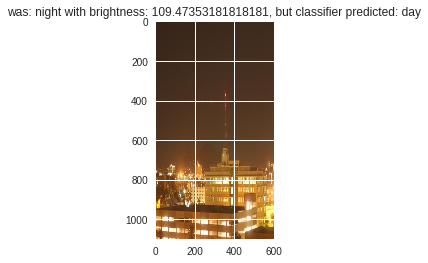

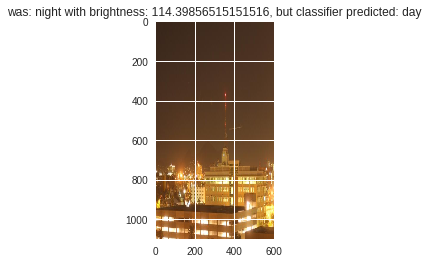

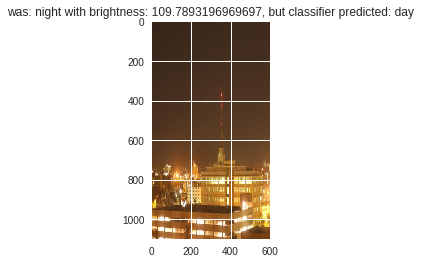

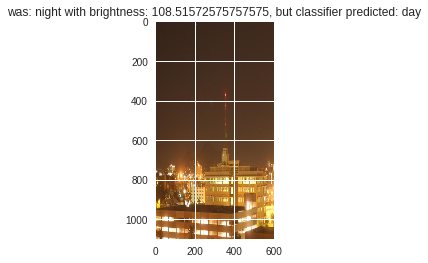

In [57]:
# this code snippet simply geos through the entire training set and checks the
# accuracy of our classifier by using the simple accuracy equation
# acc = 100 * (correctly_classified / total_samples)

correct = 0

# printing the two threshold values as were defined in the classifier function 

diff = average_day_brightness - average_night_brightness

print("average_day_brightness_threshold: " + 
      str(average_day_brightness - diff/2))
print("average_night_brightness_threshold: " + 
      str(average_night_brightness + diff/2))

# all the incorrectly classified images are shown along with their average 'v'
# channel values

for i in range(240):
  a = STANDARDIZED_LIST[i][0]
  b = decode(classifier(a, average_day_brightness, average_night_brightness))
  c = decode(STANDARDIZED_LIST[i][1])
  if c == b:
    correct = correct + 1
  elif c != b:
    plt.figure()
    plt.title("was: " + str(c) + " with brightness: " + 
              str(average_brightness(a)) + ", but classifier predicted: " + 
              str(b))
    plt.imshow(a)
  #plt.figure()
  #plt.title(str(b) + " and the real label is: " + str(c))
  #plt.imshow(a)
  
accuracy = correct / len(STANDARDIZED_LIST)
print(accuracy * 100)

In [0]:
# loading the test dataset and standardizing it

test_image_directory = '/content/gdrive/My Drive/CVND_Exercises-master/1_1_Image_Representation/day_night_images/test'
test_dataset = load_dataset(test_image_directory)
STANDARDIZED_TEST_LIST = standardize(test_dataset)

194.2690287878788


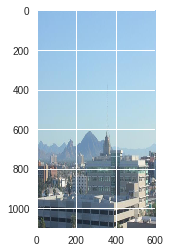

In [59]:
# exploring the test dataset

a = average_brightness(STANDARDIZED_TEST_LIST[0][0])
print(a)
plt.imshow(STANDARDIZED_TEST_LIST[0][0])

average_day_brightness_threshold: 103.28997116792931
average_night_brightness_threshold: 103.28997116792931
92.5


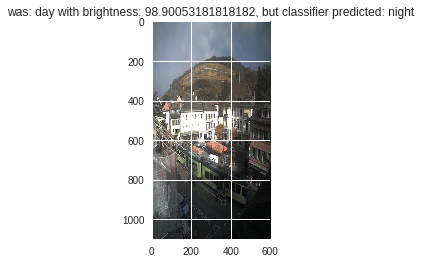

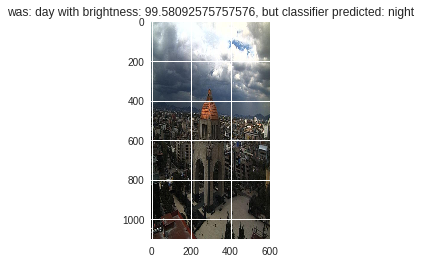

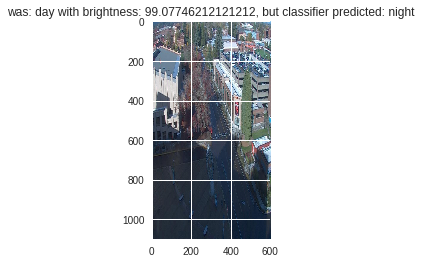

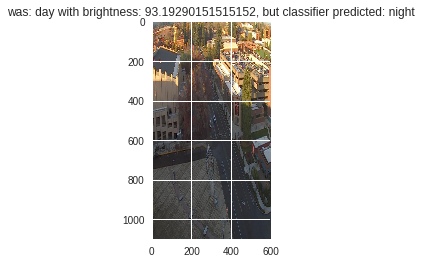

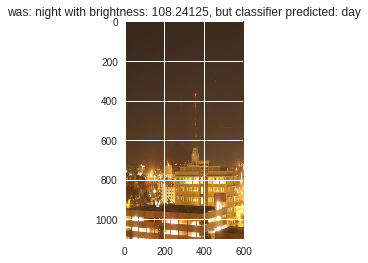

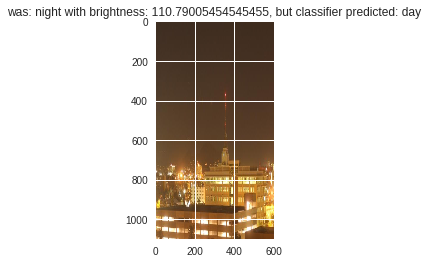

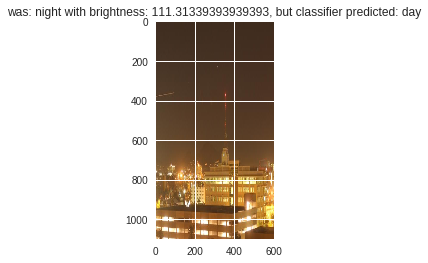

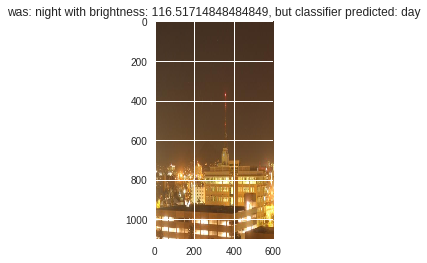

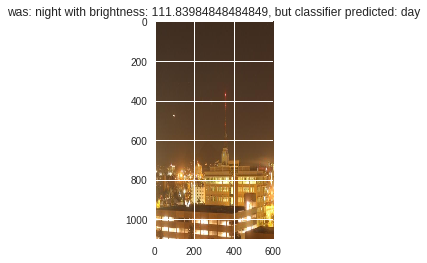

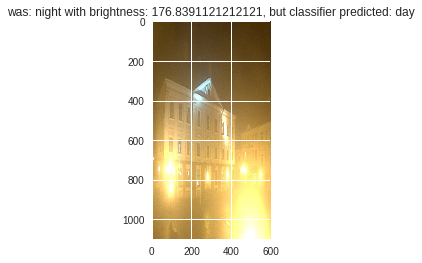

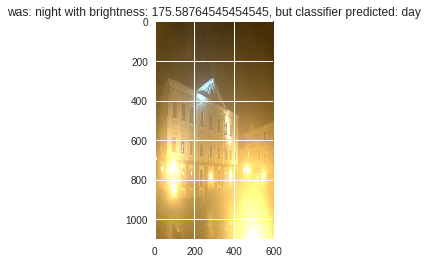

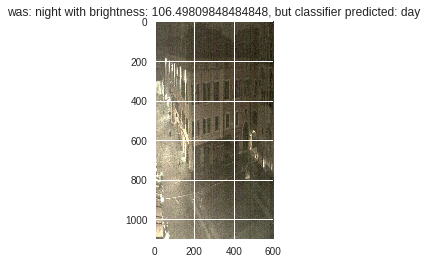

In [60]:
# calculating the accuracy over the test dataset
# was able to get 92.5% accuracy

correct = 0

diff = average_day_brightness - average_night_brightness

print("average_day_brightness_threshold: " + 
      str(average_day_brightness - diff/2))
print("average_night_brightness_threshold: " + 
      str(average_night_brightness + diff/2))

# all the incorrectly classified images are shown along with their average 'v'
# channel values

for i in range(len(STANDARDIZED_TEST_LIST)):
  a = STANDARDIZED_TEST_LIST[i][0]
  b = decode(classifier(a, average_day_brightness, average_night_brightness))
  c = decode(STANDARDIZED_TEST_LIST[i][1])
  if c == b:
    correct = correct + 1
  elif c != b:
    plt.figure()
    plt.title("was: " + str(c) + " with brightness: " + 
              str(average_brightness(a)) + ", but classifier predicted: " + 
              str(b))
    plt.imshow(a)
  #plt.figure()
  #plt.title(str(b) + " and the real label is: " + str(c))
  #plt.imshow(a)
  
accuracy = correct / len(STANDARDIZED_TEST_LIST)
print(accuracy * 100)